In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing Car Sales Data

In [61]:
car_sales = pd.read_csv("./Car Sales.csv")
car_sales["Date"] = pd.to_datetime(car_sales["Date"])

car_sales["Year"] = car_sales["Date"].dt.year
car_sales["Months"] = car_sales["Date"].dt.month
car_sales["Weeknum"] = np.ceil(car_sales["Date"].dt.dayofyear / 7).astype("int")

# Year Till Date (YTD) Total Sales

In [189]:
def totalYTDSales(data, column):
    
    cur_date = data["Date"].max()
    cy = cur_date.year
    cm = cur_date.month

    ytd_sales = data[data["Year"] == cy].groupby("Year")[column].sum()
    pytd_sales = data[(data["Year"] == cy-1) & (car_sales["Months"] <= cm)].groupby("Year")[column].sum()
    ytd_sales_difference = ytd_sales.values[0] - pytd_sales.values[0]
    ytd_sales_growth = (ytd_sales_difference / pytd_sales.values[0]) * 100
    mtd_sales = data[(data["Year"] == cy) & (car_sales["Months"] == cm)].groupby("Months")[column].sum()
    
    sales_data = pd.DataFrame({
        "Year": [2023],
        "Total Sales": [ytd_sales.apply(lambda x: f"{x / 1e6:.1f}M").values[0]],
        "Sales Difference From PYTD": [np.char.mod("%.1fM", ytd_sales_difference / 1e6)],
        "Sales Growth From PYTD": [np.char.mod("%.1f%%", ytd_sales_growth)],
        "MTD Sales": [mtd_sales.apply(lambda x: f"{x / 1e6:.1f}M").values[0]]
    })

    return sales_data

totalYTDSales(car_sales, "Price ($)")

,Year,Total Sales,Sales Difference From PYTD,Sales Growth From PYTD,MTD Sales
0,2023,371.2M,70.8M,23.6%,54.3M


# Year Till Date (YTD) Average Sales

In [191]:
def averageYTDSales(data, column):
    
    cur_date = data["Date"].max()
    cy = cur_date.year
    cm = cur_date.month

    ytd_sales = data[data["Year"] == cy].groupby("Year")[column].mean()
    pytd_sales = data[(data["Year"] == cy-1) & (car_sales["Months"] <= cm)].groupby("Year")[column].mean()
    ytd_sales_difference = ytd_sales.values[0] - pytd_sales.values[0]
    ytd_sales_growth = (ytd_sales_difference / pytd_sales.values[0]) * 100
    mtd_sales = data[(data["Year"] == cy) & (car_sales["Months"] == cm)].groupby("Months")[column].mean()
    
    sales_data = pd.DataFrame({
        "Year": [2023],
        "Average Sales": [ytd_sales.apply(lambda x: f"{x / 1000:.1f}K").values[0]],
        "Sales Difference From PYTD": [np.char.mod("%.2fK", ytd_sales_difference / 1000)],
        "Sales Growth From PYTD": [np.char.mod("%.1f%%", ytd_sales_growth)],
        "MTD Sales": [mtd_sales.apply(lambda x: f"{x / 1000:.1f}K").values[0]]
    })

    return sales_data

averageYTDSales(car_sales, "Price ($)")

,Year,Average Sales,Sales Difference From PYTD,Sales Growth From PYTD,MTD Sales
0,2023,28.0K,-0.22K,-0.8%,28.3K


# Year Till Date (YTD) Total Car Sold

In [180]:
def totalYTDCarSold(data, column):
    cur_date = data["Date"].max()
    cy = cur_date.year
    cm = cur_date.month

    ytd_sales = data[data["Year"] == cy].groupby("Year")[column].count()
    pytd_sales = data[(data["Year"] == cy-1) & (car_sales["Months"] <= cm)].groupby("Year")[column].count()
    ytd_sales_difference = ytd_sales.values[0] - pytd_sales.values[0]
    ytd_sales_growth = (ytd_sales_difference / pytd_sales.values[0]) * 100
    mtd_sales = data[(data["Year"] == cy) & (car_sales["Months"] == cm)].groupby("Months")[column].count()

    sales_data = pd.DataFrame({
        "Year": [2023],
        "Average Sales": [ytd_sales.apply(lambda x: f"{x / 1000:.1f}K").values[0]],
        "Sales Difference From PYTD": [np.char.mod("%.1f", ytd_sales_difference)],
        "Sales Growth From PYTD": [np.char.mod("%.1f%%", ytd_sales_growth)],
        "MTD Sales": [mtd_sales.apply(lambda x: f"{x / 1000:.1f}K").values[0]]
    })

    return sales_data

totalYTDCarSold(car_sales, "Car_id")

,Year,Average Sales,Sales Difference From PYTD,Sales Growth From PYTD,MTD Sales
0,2023,13.3K,2616.0,24.6%,1.9K


# YTD Week Sales Trend

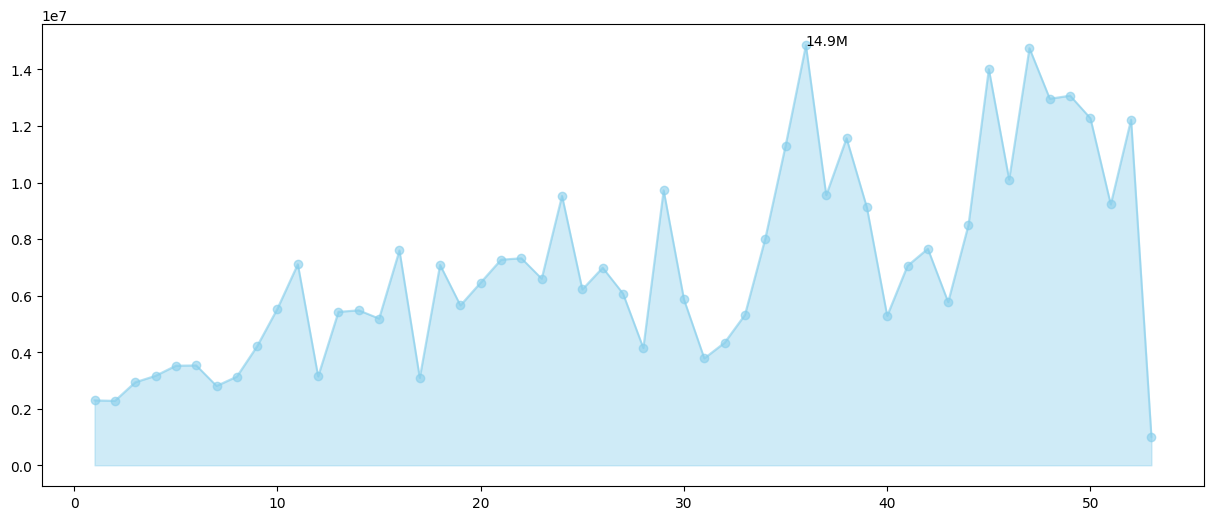

In [231]:
YTD_Week_Sales = car_sales[car_sales["Year"] == 2023].groupby("Weeknum")["Price ($)"].sum().reset_index()
max_sales_index = YTD_Week_Sales["Price ($)"].idxmax()
max_sales = YTD_Week_Sales["Price ($)"].iloc[max_sales_index]

# Plot Visuals
plt.figure(figsize=(15, 6))

plt.fill_between(YTD_Week_Sales["Weeknum"], YTD_Week_Sales["Price ($)"], color = "skyblue", alpha = 0.4)
plt.plot(YTD_Week_Sales["Weeknum"], YTD_Week_Sales["Price ($)"], color = "skyblue", alpha = 0.6, marker = "o")
plt.annotate(f"{max_sales / 1e6:.1f}M", (YTD_Week_Sales["Weeknum"][max_sales_index], max_sales))

plt.show()

# Total YTD Sales by Body Styles

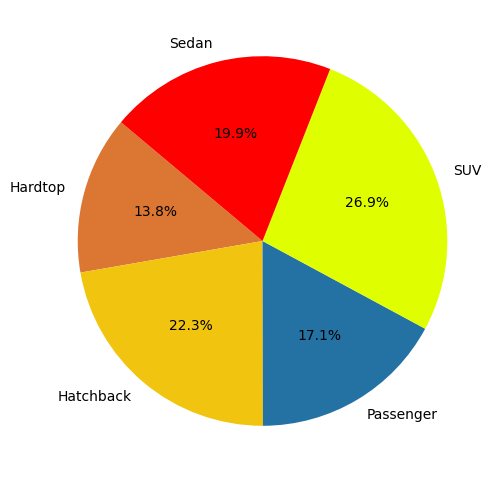

In [266]:
def totalYTDSalesByBodyStyles(data, column):
    cur_date = data["Date"].max()
    cy = cur_date.year

    body_style_wise_sales = data[data["Year"] == cy].groupby(column)["Price ($)"].sum().reset_index()

    return body_style_wise_sales


bs_sales = totalYTDSalesByBodyStyles(car_sales, "Body Style")

# Plotting Pie Chart
plt.figure(figsize=(12, 6))

plt.pie(bs_sales["Price ($)"], labels=bs_sales["Body Style"], autopct="%1.1f%%", startangle=140, colors=["#DC7633", "#F1C40F", "#2471A3", "#DFFF00", "red"])
plt.show()

# Total YTD Sales by Color

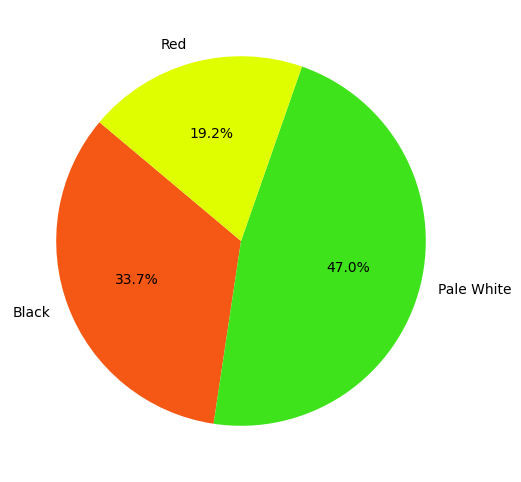

In [273]:
def totalYTDSalesByBodyStyles(data, column):
    cur_date = data["Date"].max()
    cy = cur_date.year

    color_wise_sales = data[data["Year"] == cy].groupby(column)["Price ($)"].sum().reset_index()

    return color_wise_sales

cs_sales = totalYTDSalesByBodyStyles(car_sales, "Color")

plt.figure(figsize=(12, 6))

plt.pie(cs_sales["Price ($)"], labels=cs_sales["Color"], autopct="%1.1f%%", startangle=140, colors=["#F55814", "#3FE31B", "#DFFF00"])
plt.show()

# Total YTD Car Sold by Region

In [275]:
def totalYTDCarSoldByRegion(data, column):
    cur_date = data["Date"].max()
    cy = cur_date.year

    color_wise_sales = data[data["Year"] == cy].groupby(column)["Price ($)"].count().reset_index()

    return color_wise_sales

car_sold_region = totalYTDCarSoldByRegion(car_sales, "Dealer_Region")
car_sold_region

,Dealer_Region,Price ($)
0,Aurora,1729
1,Austin,2296
2,Greenville,1740
3,Janesville,2113
4,Middletown,1722
5,Pasco,1749
6,Scottsdale,1912
